In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

KeyboardInterrupt: 

In [2]:
# Import dataset
df=pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.tail()

,Gender,Height,Weight
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405
8554,Female,60.921791,131.253738


In [5]:
df.shape

(8555, 3)

In [6]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


# Encoding

Here, we are encoding Gender feature from dataset

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label=LabelEncoder()

In [10]:
df.Gender=label.fit_transform(df['Gender'])

In [11]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [12]:
df.tail()

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


# Seperate x and y

In [13]:
x=df.drop('Weight',axis=1)

In [14]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [15]:
y=df.Weight

In [16]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [19]:
xtrain.head()

,Gender,Height
553,1,67.594031
1397,1,71.601697
7934,0,62.625985
8367,0,66.136131
3320,1,71.843308


In [20]:
ytrain.head()

553     186.751417
1397    211.031652
7934    143.768451
8367    151.814648
3320    196.505814
Name: Weight, dtype: float64

In [21]:
xtrain.shape

(5988, 2)

In [22]:
xtest.shape

(2567, 2)

# Apply Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
linear=LinearRegression()

In [25]:
linear.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
predict_value=linear.predict(xtest)

In [27]:
predict_value

array([142.44868114, 186.0517281 , 198.42283706, ..., 102.94080643,
       190.83713617, 143.34786753])

In [28]:
df["predict_value"]=linear.predict(x)

In [29]:
df.head()

,Gender,Height,Weight,predict_value
0,1,73.847017,241.893563,215.598518
1,1,68.781904,162.310473,185.429524
2,1,74.110105,212.740856,217.165534
3,1,71.730978,220.042470,202.994899
4,1,69.881796,206.349801,191.980736


In [30]:
df.tail()

,Gender,Height,Weight,predict_value
8550,0,60.483946,110.565497,116.463431
8551,0,63.423372,129.921671,133.971337
8552,0,65.584057,155.942671,146.840882
8553,0,67.429971,151.678405,157.835581
8554,0,60.921791,131.253738,119.071339


# Evaluate model

In [31]:
#Accuracy
linear.score(xtest,ytest)

0.905911242442266

In [32]:
#MSE
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(ytest,predict_value)
mse


96.83734437830606

In [33]:
#MAE
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(ytest,predict_value)
mae

7.870097130738319

# Apply KNN Regression

In [34]:
from sklearn.neighbors import KNeighborsRegressor


In [35]:
KNN=KNeighborsRegressor()


In [36]:
KNN.fit(xtrain,ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [37]:
KNN_predict=KNN.predict(xtest)

In [38]:
KNN_predict

array([142.1445657 , 181.38276924, 187.07075266, ..., 101.79654426,
       192.43702356, 145.3632227 ])

In [39]:
df['KNN_predict']=KNN.predict(x)

In [40]:
df.head()

,Gender,Height,Weight,predict_value,KNN_predict
0,1,73.847017,241.893563,215.598518,226.436919
1,1,68.781904,162.310473,185.429524,177.812864
2,1,74.110105,212.740856,217.165534,209.339650
3,1,71.730978,220.042470,202.994899,202.632591
4,1,69.881796,206.349801,191.980736,195.733860


In [41]:
df.tail()

,Gender,Height,Weight,predict_value,KNN_predict
8550,0,60.483946,110.565497,116.463431,116.524990
8551,0,63.423372,129.921671,133.971337,136.786442
8552,0,65.584057,155.942671,146.840882,151.948413
8553,0,67.429971,151.678405,157.835581,159.851415
8554,0,60.921791,131.253738,119.071339,121.998769


# Evaluate model

In [42]:
#Accuracy
KNN.score(xtest,ytest)

0.8821086423439014

In [43]:
#MSE
mse=mean_squared_error(ytest,KNN_predict)
mse

121.33528273624482

In [44]:
#MAE
mae=mean_absolute_error(ytest,KNN_predict)
mae

8.809865583894817

Here, Linear Regression accuracy is 0.91 and KNN Regression accuracy is 0.88 .so, Linear regression is best between Linear Regression and KNN Regression.

# KNN Classifier

In [45]:
df1=pd.read_csv('weight-height.csv')

In [46]:
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [47]:
df1.tail()

,Gender,Height,Weight
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405
8554,Female,60.921791,131.253738


# Encoding 

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
encode=LabelEncoder()

In [50]:
df1.Gender=encode.fit_transform(df1['Gender'])

In [51]:
df1.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [52]:
df1.tail()

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


# Seperate x and y

In [53]:
x=df1.drop('Gender',axis=1)

In [54]:
x.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [55]:
y=df1.Gender

In [56]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int32

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [59]:
xtrain.head()

,Height,Weight
553,67.594031,186.751417
1397,71.601697,211.031652
7934,62.625985,143.768451
8367,66.136131,151.814648
3320,71.843308,196.505814


In [60]:
ytrain.head()

553     1
1397    1
7934    0
8367    0
3320    1
Name: Gender, dtype: int32

# Apply Decision tree classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt=DecisionTreeClassifier()

In [63]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
predict=dt.predict(xtest)

In [65]:
predict=dt.predict(xtest)

array([0, 1, 1, ..., 0, 1, 0])

In [66]:
df1['predict']=dt.predict(x)

In [67]:
df1.head()

,Gender,Height,Weight,predict
0,1,73.847017,241.893563,1
1,1,68.781904,162.310473,1
2,1,74.110105,212.740856,1
3,1,71.730978,220.042470,1
4,1,69.881796,206.349801,1


In [68]:
df1.tail()

,Gender,Height,Weight,predict
8550,0,60.483946,110.565497,0
8551,0,63.423372,129.921671,0
8552,0,65.584057,155.942671,0
8553,0,67.429971,151.678405,0
8554,0,60.921791,131.253738,0


In [71]:
np.array(ytest)

array([0, 1, 1, ..., 0, 1, 0])

# Evaluate Model

In [73]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_roc_curve

In [74]:
clr=classification_report(ytest,predict)

In [76]:
print(clr)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1066
           1       0.90      0.92      0.91      1501

    accuracy                           0.89      2567
   macro avg       0.89      0.88      0.89      2567
weighted avg       0.89      0.89      0.89      2567



In [77]:
cm=confusion_matrix(ytest,predict)

In [78]:
print(cm)

[[ 908  158]
 [ 123 1378]]


Text(33.0, 0.5, 'Actual value')

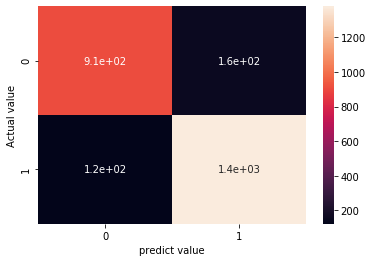

In [79]:
sns.heatmap(cm,annot=True)
plt.xlabel('predict value')
plt.ylabel('Actual value')

In [80]:
tp,fn,fp,tn=confusion_matrix(ytest,predict).reshape(-1)

In [81]:
tp

908

In [82]:
tn

1378

# Accuracy

In [84]:
accuracy=(tp+tn)/(tp+fp+tn+fn)
accuracy

0.8905336969224776

# Positive Predictive Value or Precision

In [85]:
ppv=tp/(tp+fp)
ppv

0.8806983511154219

# Sensitivity,Recall or True Positive Rate

In [86]:
TPR=tp/(tp+fn)
TPR

0.851782363977486

# False Positive Rate

In [88]:
FPR= fp/(fp+tn)
FPR

0.08194536975349767

# F1 Measure

In [89]:
f1=(ppv+TPR)/2
f1

0.8662403575464539

# F1 Score

In [90]:
f1_score=(2*ppv*TPR)/(ppv+TPR)
f1_score

0.865999046256557

# True Negative Rate

In [91]:
TNR=tn/(tn+fp)
TNR

0.9180546302465024

# Critical Sucess Index

In [92]:
csi=tp/(tp+fn+fp)
csi

0.7636669470142977

# False Discovery Rate

In [93]:
FDR=fp/(tp+fp)
FDR

0.11930164888457807

# ROC and AUC curve

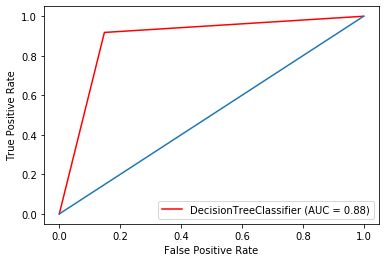

In [95]:
plot_roc_curve(dt,xtest,ytest,color='red')
plt.plot([0,1],[0,1])

# Apply KNN Classifier

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knc= KNeighborsClassifier()

In [98]:
knc.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [99]:
knc_predict=knc.predict(xtest)

In [100]:
knc_predict

array([0, 1, 1, ..., 0, 1, 0])

In [101]:
df1['knc_predict']=knc.predict(x)

In [102]:
df1.head()

,Gender,Height,Weight,predict,knc_predict
0,1,73.847017,241.893563,1,1
1,1,68.781904,162.310473,1,1
2,1,74.110105,212.740856,1,1
3,1,71.730978,220.042470,1,1
4,1,69.881796,206.349801,1,1


In [103]:
df1.tail()

,Gender,Height,Weight,predict,knc_predict
8550,0,60.483946,110.565497,0,0
8551,0,63.423372,129.921671,0,0
8552,0,65.584057,155.942671,0,0
8553,0,67.429971,151.678405,0,0
8554,0,60.921791,131.253738,0,0


# Evaluate Model

In [104]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_roc_curve

In [105]:
cr=classification_report(ytest,knc_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1066
           1       0.92      0.93      0.93      1501

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567



In [107]:
cm1=confusion_matrix(ytest,knc_predict)
print(cm1)

[[ 945  121]
 [ 102 1399]]


Text(33.0, 0.5, 'Actual value')

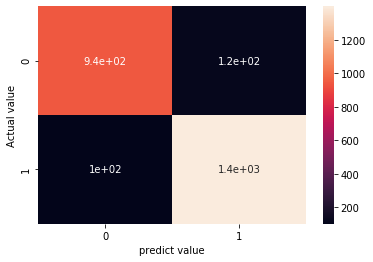

In [108]:
sns.heatmap(cm1,annot=True)
plt.xlabel("predict value")
plt.ylabel('Actual value')

In [109]:
tp,fn,fp,tn=confusion_matrix(ytest,knc_predict).reshape(-1)

In [110]:
tp

945

In [111]:
tn

1399

# Accuracy

In [112]:
accuracy=(tp+tn)/(tp+fp+tn+fn)
accuracy

0.9131281651733542

# Positive Predictive Value or Precision

In [113]:
ppv=tp/(tp+fp)
ppv

0.9025787965616046

# Sensitivity,Recall or True Positive Rate

In [114]:
TPR=tp/(tp+fn)
TPR

0.8864915572232646

# False Positive Rate

In [115]:
FPR= fp/(fp+tn)
FPR

0.06795469686875416

# F1 Measure

In [116]:
f1=(ppv+TPR)/2
f1

0.8945351768924346

# F1 Score

In [117]:
f1_score=(2*ppv*TPR)/(ppv+TPR)
f1_score

0.8944628490298154

# True Negative Rate

In [118]:
TNR=tn/(tn+fp)
TNR

0.9320453031312458

# Critical Sucess Index

In [119]:
csi=tp/(tp+fn+fp)
csi

0.8090753424657534

# False Discovery Rate


In [121]:

FDR=fp/(tp+fp)
FDR

0.09742120343839542

# ROC and AUC curve

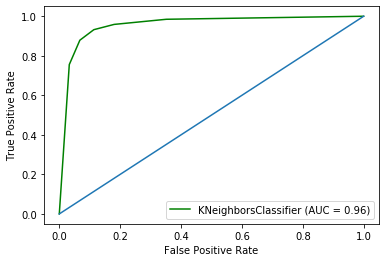

In [122]:
plot_roc_curve(knc,xtest,ytest,color='green')
plt.plot([0,1],[0,1])

Here, AUC of Decision tree classification is 0.88 and AUC of KNN classification is 0.96 .so, KNN classification is best between Decision tree classification and KNN classification.